**1. Import the libraries**

In [219]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import math
from scipy.stats import variation

In [220]:
%matplotlib inline
warnings.filterwarnings('ignore')
sns.set_style("darkgrid")

In [221]:
import sklearn
from sklearn.metrics import mean_squared_error

**2. Read and understand the data**

In [222]:
data = pd.read_excel('/content/data.xls')
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


For our purposes we need only the next columns:

In [223]:
columns_to_select = ['Order Date', 'Segment', 'Market', 'Sales', 'Profit']

In [224]:
data = data[columns_to_select]
data.head()

,Order Date,Segment,Market,Sales,Profit
0,2012-07-31,Consumer,US,2309.650,762.1845
1,2013-02-05,Corporate,APAC,3709.395,-288.7650
2,2013-10-17,Consumer,APAC,5175.171,919.9710
3,2013-01-28,Home Office,EU,2892.510,-96.5400
4,2013-11-05,Consumer,Africa,2832.960,311.5200


In [225]:
# Check the shape of the data
data.shape

(51290, 5)

In [227]:
# Check the overall info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Order Date  51290 non-null  datetime64[ns]
 1   Segment     51290 non-null  object        
 2   Market      51290 non-null  object        
 3   Sales       51290 non-null  float64       
 4   Profit      51290 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 2.0+ MB


In [228]:
# Check the numerical data stats
data.describe()

,Sales,Profit
count,51290.000000,51290.000000
mean,246.490581,28.610982
std,487.565361,174.340972
min,0.444000,-6599.978000
25%,30.758625,0.000000
50%,85.053000,9.240000
75%,251.053200,36.810000
max,22638.480000,8399.976000


**3. Exploratory Data Analysis**

3.1 Missing values

In [229]:
data.isnull().sum()

Order Date    0
Segment       0
Market        0
Sales         0
Profit        0
dtype: int64

Inference: There are no missing values in the data.

**3.2 Outliers**

In [230]:
data.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Sales,Profit
count,51290.000000,51290.000000
mean,246.490581,28.610982
std,487.565361,174.340972
min,0.444000,-6599.978000
25%,30.758625,0.000000
50%,85.053000,9.240000
75%,251.053200,36.810000
90%,632.225736,112.680000
95%,1015.955640,211.500000
99%,2301.000000,587.359950


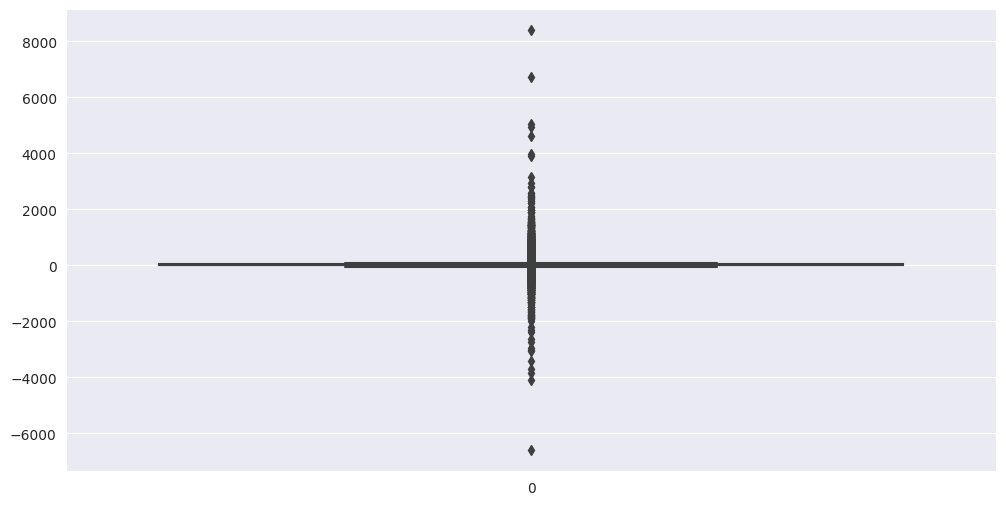

In [231]:
plt.figure(figsize=(12,6))
sns.boxplot(data['Profit'])
plt.show()

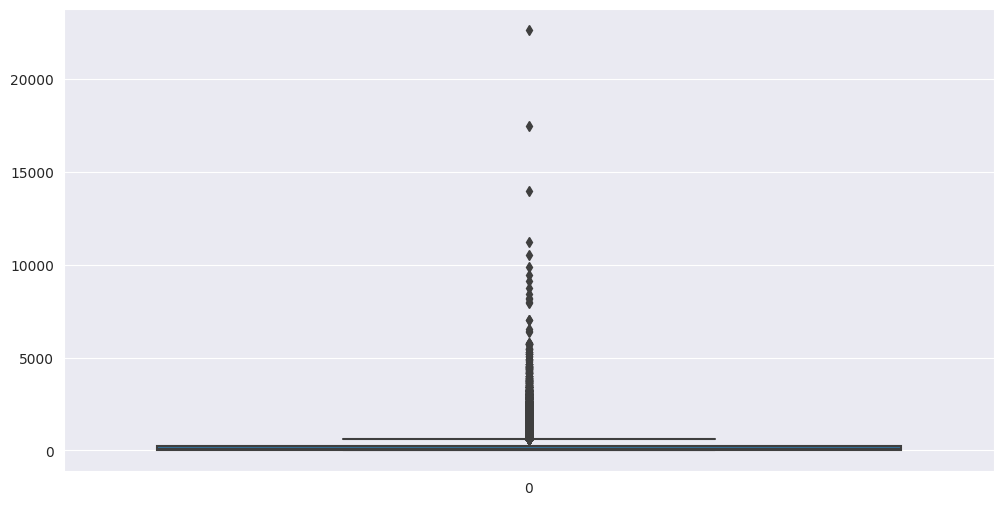

In [104]:
plt.figure(figsize=(12,6))
sns.boxplot(data['Sales'])
plt.show()

**Inference: We can clearly see that there are outliers in the data.**

**We will keep the outliers as they are. We cannot delete them as this is a time series data and deleting any data point will lead to discontinuity in the data.**

**3.3 Univariate Analysis**

In [105]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Order Date  51290 non-null  datetime64[ns]
 1   Segment     51290 non-null  object        
 2   Market      51290 non-null  object        
 3   Sales       51290 non-null  float64       
 4   Profit      51290 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 2.0+ MB


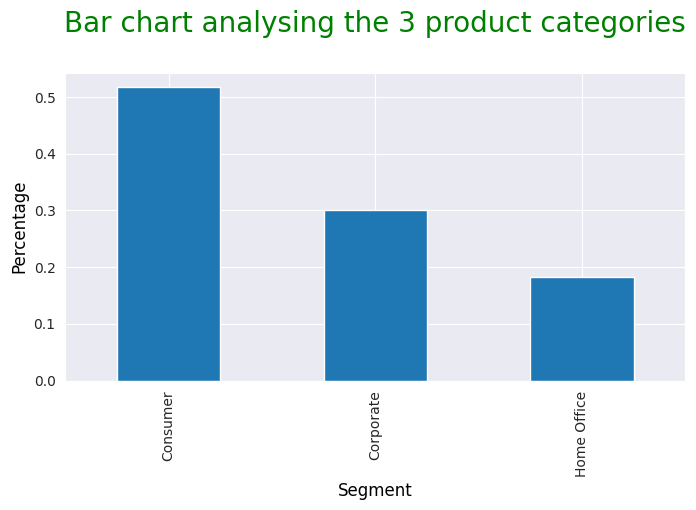

In [106]:
#Segment column
plt.figure(figsize= (8,4))
data["Segment"].value_counts(normalize=True).plot.bar()
plt.title("Bar chart analysing the 3 product categories\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel("Segment", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.ylabel("Percentage", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'} )
plt.show()

**Inference : Consumer category forms the most in demand product category worldwide for Global Mart.**

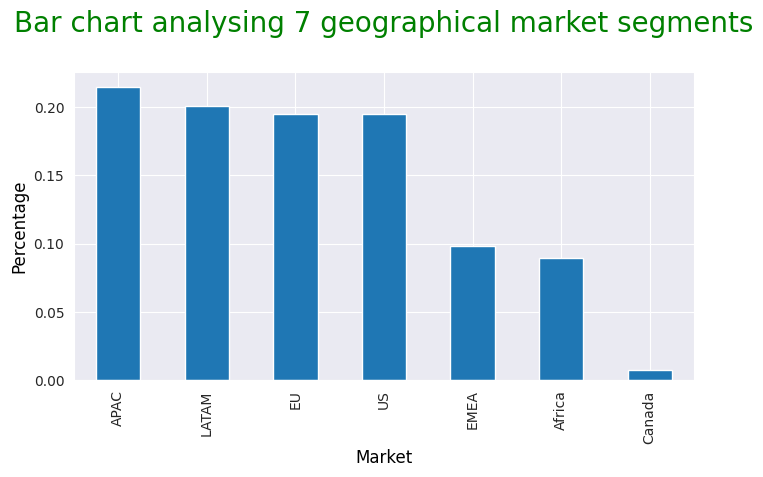

In [107]:
#Market column
plt.figure(figsize= (8,4))
data["Market"].value_counts(normalize=True).plot.bar()
plt.title("Bar chart analysing 7 geographical market segments\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel("Market", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.ylabel("Percentage", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'} )
plt.show()

**Inference : APAC segment is the most important market segment for Global Mart since most shipments take place in APAC region.**

**3.4 Bivariate Analysis**

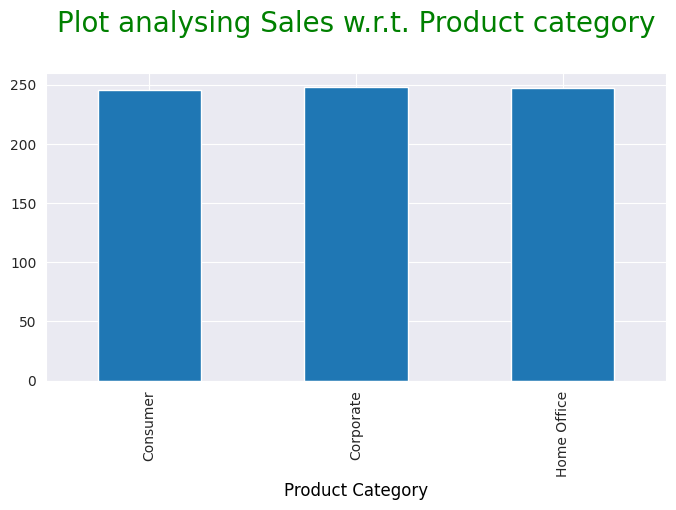

In [108]:
# Sales w.r.t. Product Category
plt.figure(figsize= (8,4))
data.groupby("Segment")["Sales"].mean().plot.bar()
plt.title("Plot analysing Sales w.r.t. Product category\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel("Product Category", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.show()

**Inference : Though Corporate is the leading category, Corporate category comprises of highest sales amounts.**

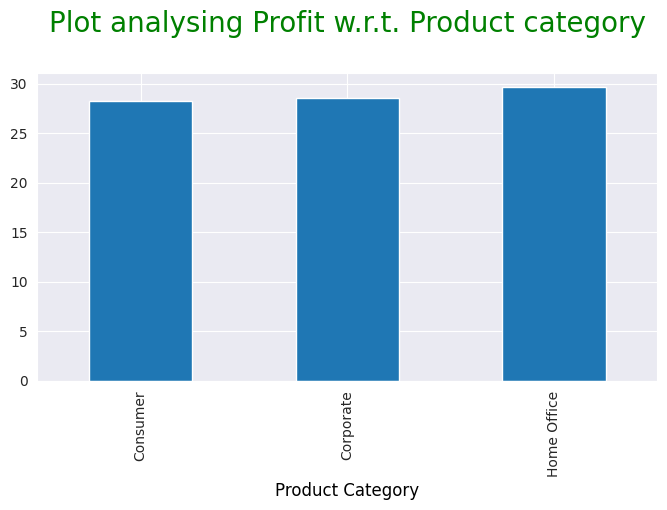

In [109]:
# Profit w.r.t. Product Category
plt.figure(figsize= (8,4))
data.groupby("Segment")["Profit"].mean().plot.bar()
plt.title("Plot analysing Profit w.r.t. Product category\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel("Product Category", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.show()

**Inference : Home Office category makes highest profits.**.

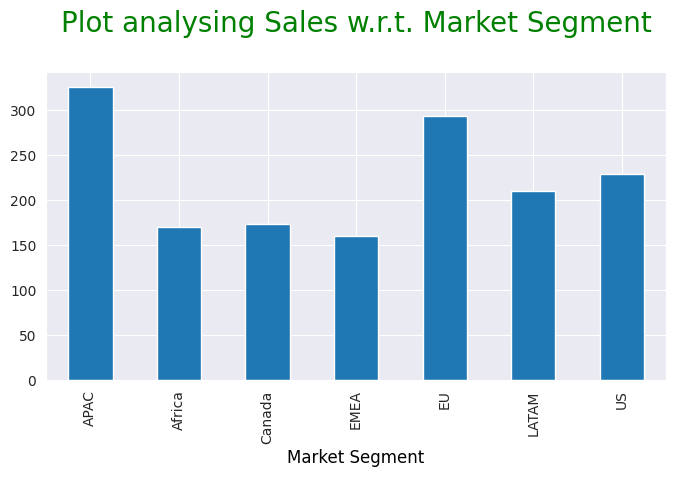

In [110]:
# Sales w.r.t. Market Segment
plt.figure(figsize= (8,4))
data.groupby("Market")["Sales"].mean().plot.bar()
plt.title("Plot analysing Sales w.r.t. Market Segment\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel("Market Segment", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.show()

**Inference : APAC region has highest Sales.**

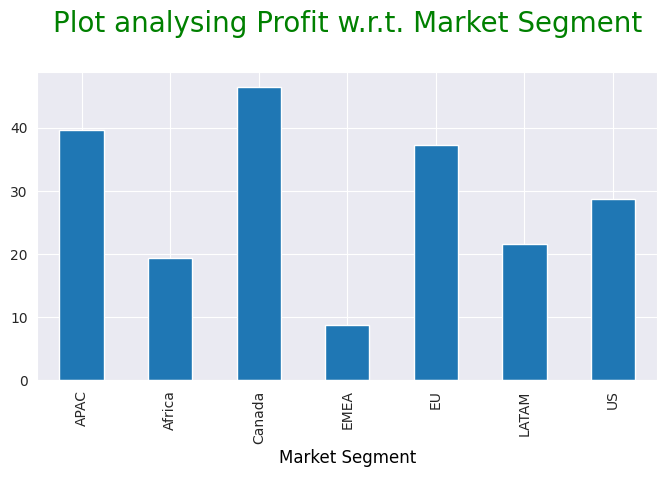

In [111]:
# Profit w.r.t. Market Segment
plt.figure(figsize= (8,4))
data.groupby("Market")["Profit"].mean().plot.bar()
plt.title("Plot analysing Profit w.r.t. Market Segment\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel("Market Segment", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.show()

**Inference : Canada region makes highest profits.**

**3.5 Multivariate Analysis**

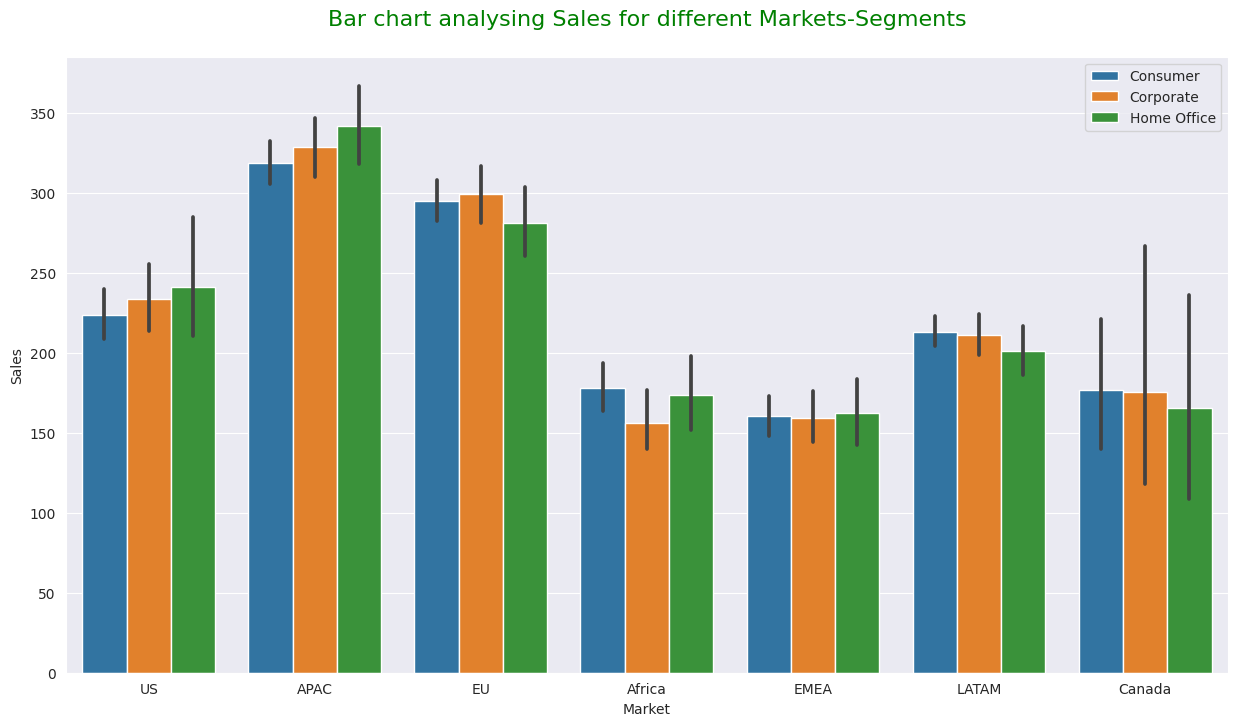

In [112]:
plt.figure(figsize=(15,8))
sns.barplot(data=data, x='Market', y= 'Sales', hue='Segment')
plt.title('Bar chart analysing Sales for different Markets-Segments\n', fontdict={'fontsize': 16, 'fontweight' : 5, 'color' : 'Green'})
plt.legend(loc = 'best')
plt.show()

**Inference: APAC-home office is the leading Market-Segment combination in terms of Sales.**

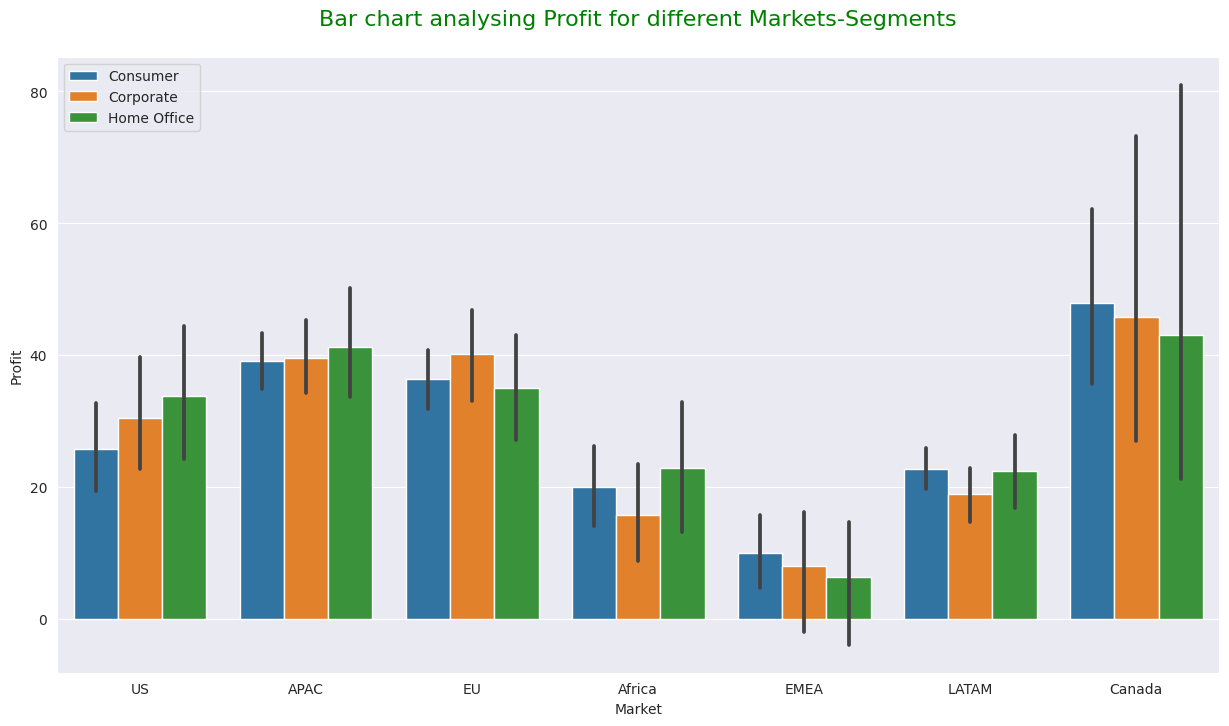

In [113]:
plt.figure(figsize=(15,8))
sns.barplot(data=data, x='Market', y= 'Profit', hue='Segment')
plt.title('Bar chart analysing Profit for different Markets-Segments\n', fontdict={'fontsize': 16, 'fontweight' : 5, 'color' : 'Green'})
plt.legend(loc = 'best')
plt.show()

**Inference: Canada-Consumer is the most profitable market-segment.**

**4. Data Preparation**

In [114]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Order Date  51290 non-null  datetime64[ns]
 1   Segment     51290 non-null  object        
 2   Market      51290 non-null  object        
 3   Sales       51290 non-null  float64       
 4   Profit      51290 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 2.0+ MB


**Finding 21 Market Segments by combining the respective 7 geographical markets for each of 3 product segments**

In [232]:
# Concatenate the Market and Segment column to get the Market Segment data
data['Market_Segment'] = data['Market']+'-'+data['Segment']

In [233]:
data.head() # Check whether the new column is properly created

,Order Date,Segment,Market,Sales,Profit,Market_Segment
0,2012-07-31,Consumer,US,2309.650,762.1845,US-Consumer
1,2013-02-05,Corporate,APAC,3709.395,-288.7650,APAC-Corporate
2,2013-10-17,Consumer,APAC,5175.171,919.9710,APAC-Consumer
3,2013-01-28,Home Office,EU,2892.510,-96.5400,EU-Home Office
4,2013-11-05,Consumer,Africa,2832.960,311.5200,Africa-Consumer


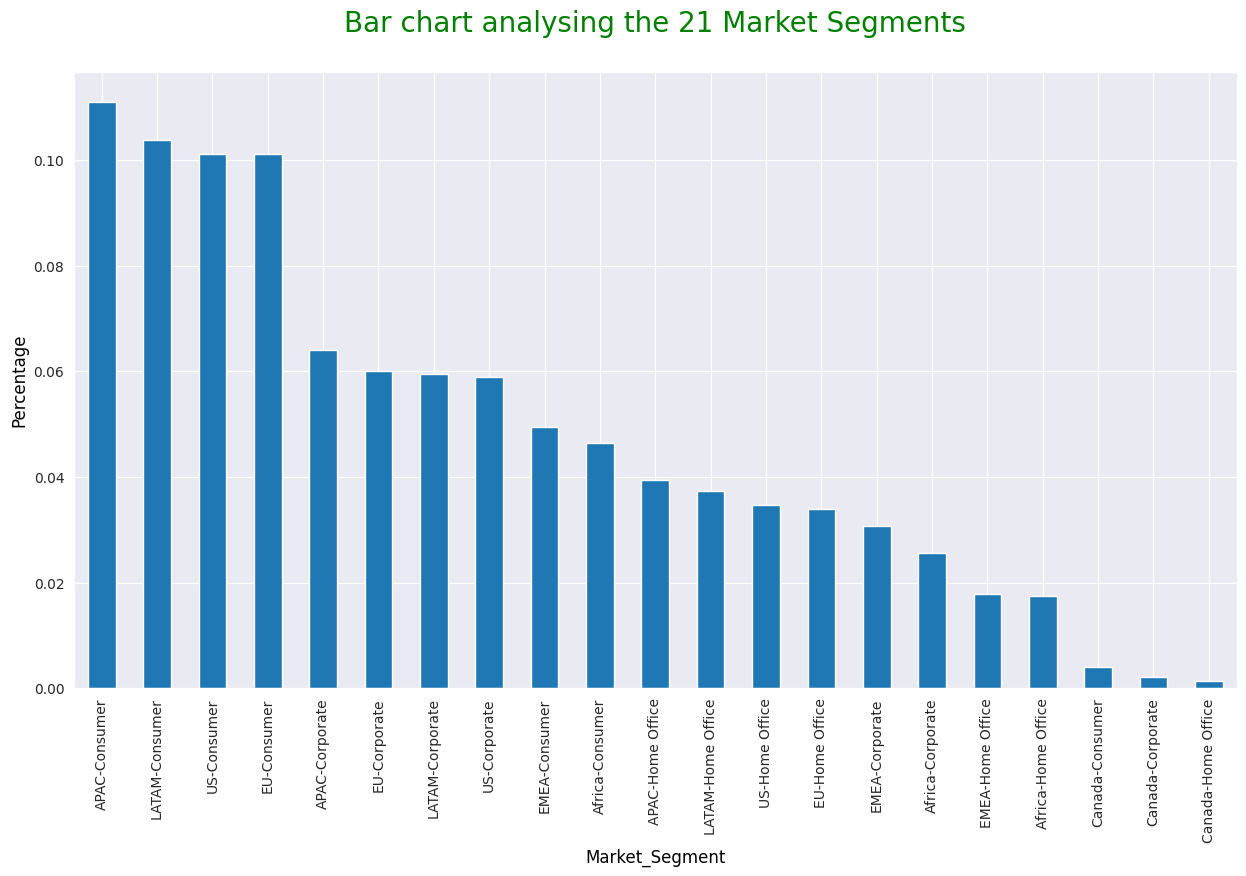

In [234]:
# Market_Segment column
plt.figure(figsize= (15,8))
data["Market_Segment"].value_counts(normalize=True).plot.bar()
plt.title("Bar chart analysing the 21 Market Segments\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel("Market_Segment", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.ylabel("Percentage", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'} )
plt.show()

In [235]:
data.drop(['Segment', 'Market'], axis = 1, inplace = True)

In [236]:
data.head() # dataset having Order-Date, Sales, Profit against each market segment

,Order Date,Sales,Profit,Market_Segment
0,2012-07-31,2309.650,762.1845,US-Consumer
1,2013-02-05,3709.395,-288.7650,APAC-Corporate
2,2013-10-17,5175.171,919.9710,APAC-Consumer
3,2013-01-28,2892.510,-96.5400,EU-Home Office
4,2013-11-05,2832.960,311.5200,Africa-Consumer


**Coverting the Order Date column to date time format.**

In [237]:
data['Order Date'].head()

0   2012-07-31
1   2013-02-05
2   2013-10-17
3   2013-01-28
4   2013-11-05
Name: Order Date, dtype: datetime64[ns]

In [238]:
# Converting the Order Date to month-Year format
data['Order Date'] = pd.to_datetime(data['Order Date']).dt.to_period('m')

In [239]:
data.head()

,Order Date,Sales,Profit,Market_Segment
0,2012-07,2309.650,762.1845,US-Consumer
1,2013-02,3709.395,-288.7650,APAC-Corporate
2,2013-10,5175.171,919.9710,APAC-Consumer
3,2013-01,2892.510,-96.5400,EU-Home Office
4,2013-11,2832.960,311.5200,Africa-Consumer


In [240]:
# Displaying the time series data consisting of order, sales, profit for market segments
data.groupby(['Market_Segment', 'Order Date']).sum()

Sales     Profit
Market_Segment Order Date                       
APAC-Consumer  2011-01     15711.7125   991.2825
               2011-02     12910.8588  1338.8688
               2011-03     19472.5632  3747.1632
               2011-04     15440.3046  3846.4746
               2011-05     24348.9723  3639.9423
...                               ...        ...
US-Home Office 2014-08      6024.9360  1552.4576
               2014-09     20435.0080  2249.1033
               2014-10     29871.8930  4031.1877
               2014-11     21046.7080  2303.8764
               2014-12     16044.6550  3965.6265

[965 rows x 2 columns]

**We create a Pivot Table to show the data by Order Date as index and each of the 21 market segments as columns with total profit values.**

In [241]:
data_cov = pd.pivot_table(data = data,
                          index = "Order Date",
                          columns = "Market_Segment",
                          values = "Profit",
                          aggfunc = "sum")
data_cov.head()

Market_Segment,APAC-Consumer,APAC-Corporate,APAC-Home Office,Africa-Consumer,Africa-Corporate,Africa-Home Office,Canada-Consumer,Canada-Corporate,Canada-Home Office,EMEA-Consumer,...,EMEA-Home Office,EU-Consumer,EU-Corporate,EU-Home Office,LATAM-Consumer,LATAM-Corporate,LATAM-Home Office,US-Consumer,US-Corporate,US-Home Office
Order Date,,,,,,,,,,,,,,,,,,,,,
2011-01,991.2825,11.5998,86.4423,475.683,219.096,856.710,3.12,5.7,NaN,-2099.364,...,116.400,-845.8290,501.9315,975.360,1976.98976,1150.88400,-106.48800,762.8067,300.9145,1383.0499
2011-02,1338.8688,4358.8254,-417.4128,1441.926,-490.551,820.302,23.31,NaN,87.99,267.060,...,216.690,-1808.1180,2988.4065,-181.041,902.37752,721.25420,300.19936,500.2865,307.2995,58.1420
2011-03,3747.1632,1213.3386,923.7492,322.140,-586.716,67.320,335.55,NaN,84.03,1598.718,...,78.972,2480.5410,736.9890,503.223,2585.17924,39.07512,285.46400,597.2773,333.0515,-431.5989
2011-04,3846.4746,71.0265,657.1080,292.122,776.691,500.136,55.08,NaN,NaN,-300.879,...,-420.090,2496.6405,1056.1785,63.858,387.72148,259.25600,-421.73440,1155.0757,1393.3828,940.3767
2011-05,3639.9423,2534.1672,-272.1717,110.004,241.338,34.926,77.97,NaN,NaN,568.302,...,262.968,254.0805,1586.2740,201.102,1002.34724,-531.74444,-240.11600,698.9171,2063.5013,-23.7088


**Train-Test Split : We divide the data such that train set contains 42 months and test set contains 6 months data**

In [242]:
train_len = 42
train = data_cov[0 : train_len]
test = data_cov[train_len : ]

In [243]:
train.shape

(42, 21)

In [244]:
test.shape

(6, 21)

**Coefficient of variation is a ratio of the standard deviation to mean. We need to find the market segment for which value of Coefficient of variation is the least for profit. This is because, less standard deviation means less variation in profit, which means more consistent are the profit figures for that region over the given period. We calculate the Coefficient of Variation for each of the 21 market segments for 42 months(train data) to decide which market segment is consistently profitable.**

In [245]:
# Calculate mean for the train set
train_mean = np.mean(train)
train_mean

Market_Segment
APAC-Consumer         4223.553586
APAC-Corporate        2556.998957
APAC-Home Office      1379.120743
Africa-Consumer        798.898929
Africa-Corporate       426.027286
Africa-Home Office     333.002143
Canada-Consumer        230.067500
Canada-Corporate       110.377500
Canada-Home Office     138.247500
EMEA-Consumer          415.354786
EMEA-Corporate         172.274500
EMEA-Home Office       123.249214
EU-Consumer           3627.517036
EU-Corporate          2251.993036
EU-Home Office        1097.441500
LATAM-Consumer        2252.677529
LATAM-Corporate       1075.994223
LATAM-Home Office      788.531853
US-Consumer           2603.736252
US-Corporate          1853.568607
US-Home Office        1062.397424
dtype: float64

In [246]:
# Calculate standard deviation for the train set
train_std = np.std(train)
train_std

Market_Segment
APAC-Consumer         2518.944225
APAC-Corporate        1871.535073
APAC-Home Office      1446.445137
Africa-Consumer       1141.894252
Africa-Corporate       709.261893
Africa-Home Office     662.629728
Canada-Consumer        339.601099
Canada-Corporate       132.146175
Canada-Home Office     302.526945
EMEA-Consumer         1128.515779
EMEA-Corporate        1167.958953
EMEA-Home Office       747.714036
EU-Consumer           2348.762579
EU-Corporate          1552.403019
EU-Home Office        1223.296718
LATAM-Consumer        1533.362508
LATAM-Corporate        947.154491
LATAM-Home Office     1059.547064
US-Consumer           2851.858407
US-Corporate          1904.002356
US-Home Office        1293.079478
dtype: float64

In [247]:
# Calculate Coefficient of variation for the train set
train_CoV = train_std/train_mean
train_CoV

Market_Segment
APAC-Consumer         0.596404
APAC-Corporate        0.731926
APAC-Home Office      1.048817
Africa-Consumer       1.429335
Africa-Corporate      1.664827
Africa-Home Office    1.989866
Canada-Consumer       1.476093
Canada-Corporate      1.197220
Canada-Home Office    2.188300
EMEA-Consumer         2.716992
EMEA-Corporate        6.779639
EMEA-Home Office      6.066684
EU-Consumer           0.647485
EU-Corporate          0.689346
EU-Home Office        1.114681
LATAM-Consumer        0.680684
LATAM-Corporate       0.880260
LATAM-Home Office     1.343696
US-Consumer           1.095295
US-Corporate          1.027209
US-Home Office        1.217133
dtype: float64

In [248]:
# Creating a dataframe CoV displaying the mean, std. dev. and Coeff. of Var. values against each of the market segments
CoV = pd.DataFrame({'Mean' : train_mean, 'Std_Dev' : train_std, 'Coeff_of_Var' : train_CoV})
CoV

,Mean,Std_Dev,Coeff_of_Var
Market_Segment,,,
APAC-Consumer,4223.553586,2518.944225,0.596404
APAC-Corporate,2556.998957,1871.535073,0.731926
APAC-Home Office,1379.120743,1446.445137,1.048817
Africa-Consumer,798.898929,1141.894252,1.429335
Africa-Corporate,426.027286,709.261893,1.664827
Africa-Home Office,333.002143,662.629728,1.989866
Canada-Consumer,230.067500,339.601099,1.476093
Canada-Corporate,110.377500,132.146175,1.197220
Canada-Home Office,138.247500,302.526945,2.188300


In [249]:
# Find the market segment with least Coefficient of Variation
CoV.sort_values('Coeff_of_Var')

,Mean,Std_Dev,Coeff_of_Var
Market_Segment,,,
APAC-Consumer,4223.553586,2518.944225,0.596404
EU-Consumer,3627.517036,2348.762579,0.647485
LATAM-Consumer,2252.677529,1533.362508,0.680684
EU-Corporate,2251.993036,1552.403019,0.689346
APAC-Corporate,2556.998957,1871.535073,0.731926
LATAM-Corporate,1075.994223,947.154491,0.880260
US-Corporate,1853.568607,1904.002356,1.027209
APAC-Home Office,1379.120743,1446.445137,1.048817
US-Consumer,2603.736252,2851.858407,1.095295


**Inference : APAC-Consumer is the market segment with least Coefficient of Variation. It means profit figures for APAC-Consumer market segment have been consistent over the train set period. Hence we choose this market segment to further calculate and predict the Sales Values.**

In [250]:
# Filter the main data frame such for APAC-Consumer market segment
data_apac_con = data[data['Market_Segment'] == 'APAC-Consumer']
data_apac_con

,Order Date,Sales,Profit,Market_Segment
2,2013-10,5175.1710,919.9710,APAC-Consumer
6,2011-11,1822.0800,564.8400,APAC-Consumer
7,2012-04,5244.8400,996.4800,APAC-Consumer
14,2013-06,3701.5200,1036.0800,APAC-Consumer
29,2012-02,1878.7200,582.3600,APAC-Consumer
...,...,...,...,...
51215,2013-01,38.9709,-32.3991,APAC-Consumer
51234,2014-11,6.9000,-0.8400,APAC-Consumer
51235,2011-11,17.2800,-13.9200,APAC-Consumer
51236,2013-07,30.6180,1.0080,APAC-Consumer


In [251]:
# Group the data by Order Date for sum of Sales
data1 = data_apac_con.groupby(['Order Date'])['Sales'].sum()
data1

Order Date
2011-01    15711.7125
2011-02    12910.8588
2011-03    19472.5632
2011-04    15440.3046
2011-05    24348.9723
2011-06    27260.0196
2011-07    15842.8317
2011-08    22012.2366
2011-09    34613.1849
2011-10    36472.0470
2011-11    37722.6039
2011-12    37846.9911
2012-01    31280.8635
2012-02    24985.6881
2012-03    14241.1761
2012-04    20926.4721
2012-05    32608.6212
2012-06    39710.0352
2012-07     8389.7316
2012-08    48444.7977
2012-09    28193.2236
2012-10    56743.0833
2012-11    51967.0140
2012-12    47343.6267
2013-01    31328.2620
2013-02    20999.7378
2013-03    28414.6209
2013-04    20508.7197
2013-05    47979.6000
2013-06    70436.8089
2013-07    34596.8247
2013-08    45251.6439
2013-09    51513.2235
2013-10    53448.5532
2013-11    47812.7784
2013-12    51717.6204
2014-01    37924.3296
2014-02    21584.5086
2014-03    46340.1096
2014-04    32897.5062
2014-05    53544.8328
2014-06    51483.7011
2014-07    36524.3028
2014-08    63521.7729
2014-09    44477.2662

**5. Time series Decomposition**

In [252]:
# Convert to data frame
data1 = pd.DataFrame(data1)

In [253]:
# Converting the index to timestamp
data1.index = data1.index.to_timestamp()

In [254]:
data1.index.dtype

dtype('<M8[ns]')

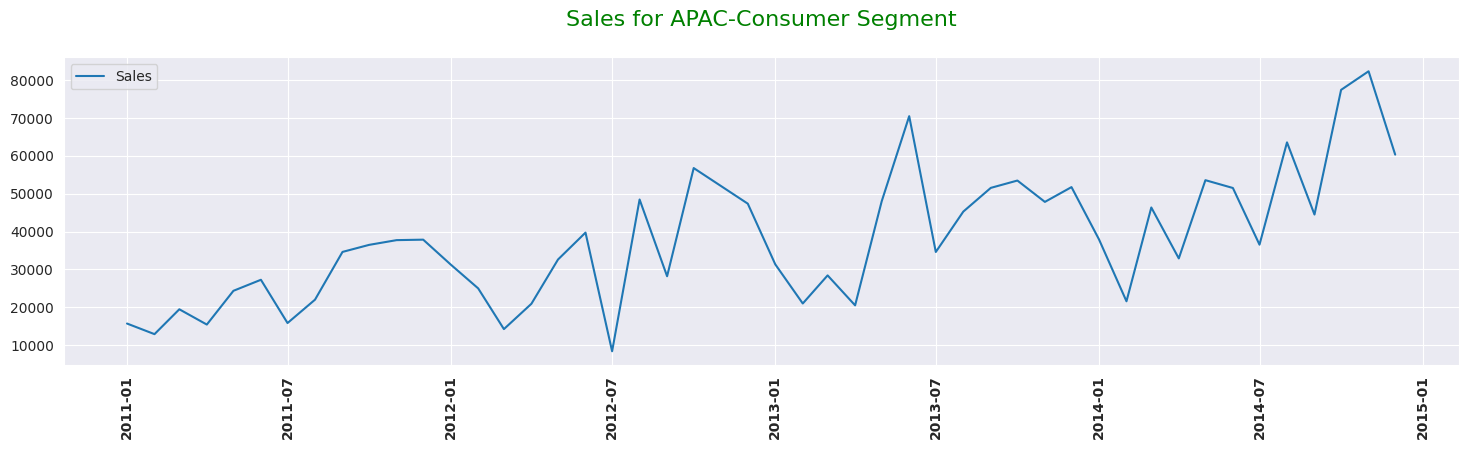

In [255]:
plt.figure(figsize=(18,4))
plt.plot(data1, label='Sales')
plt.legend(loc='best')
plt.title('Sales for APAC-Consumer Segment\n', fontdict={'fontsize': 16, 'fontweight' : 5, 'color' : 'Green'})
plt.xticks(rotation = 90,fontweight="bold")
plt.show()

**Additive seasonal decomposition**

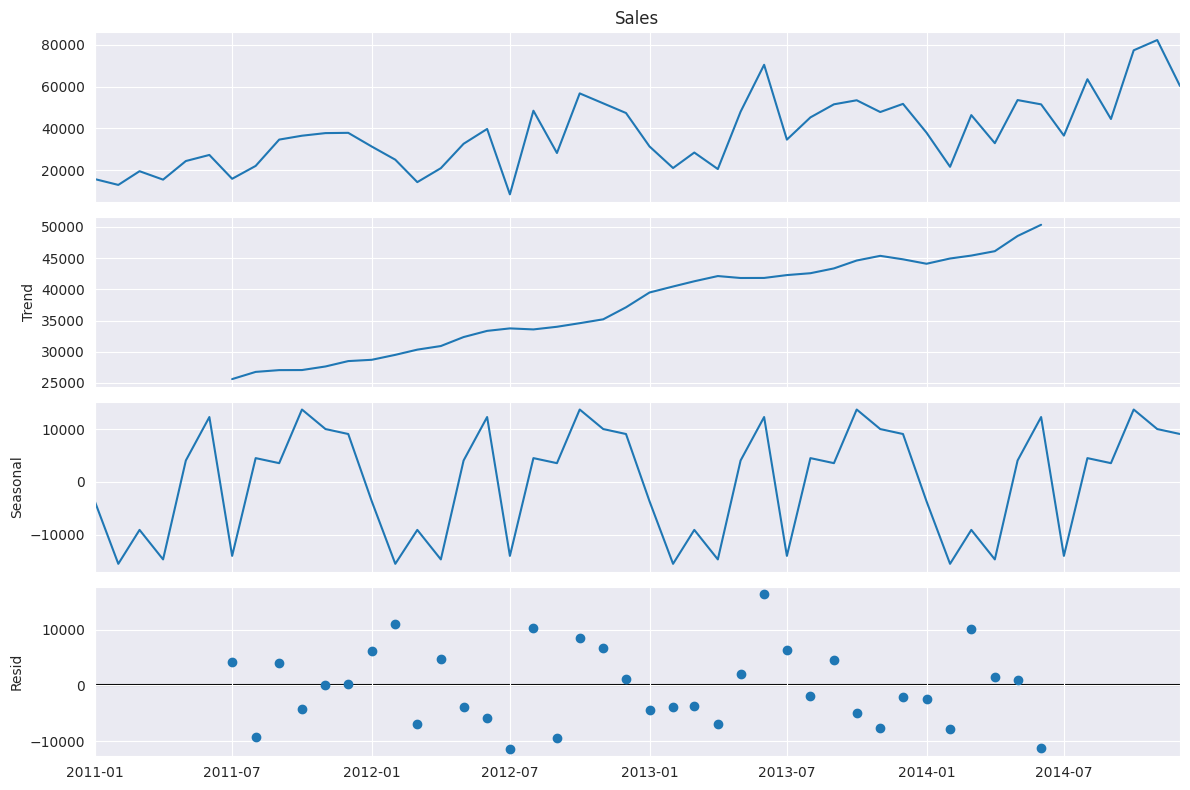

In [256]:
from pylab import rcParams
import statsmodels.api as sm

rcParams['figure.figsize'] = 12, 8

# with additive seasonal index
decomposition = sm.tsa.seasonal_decompose(data1.Sales,
                                          model = 'additive')
fig = decomposition.plot()
plt.show()

**Multiplicative seasonal decomposition**

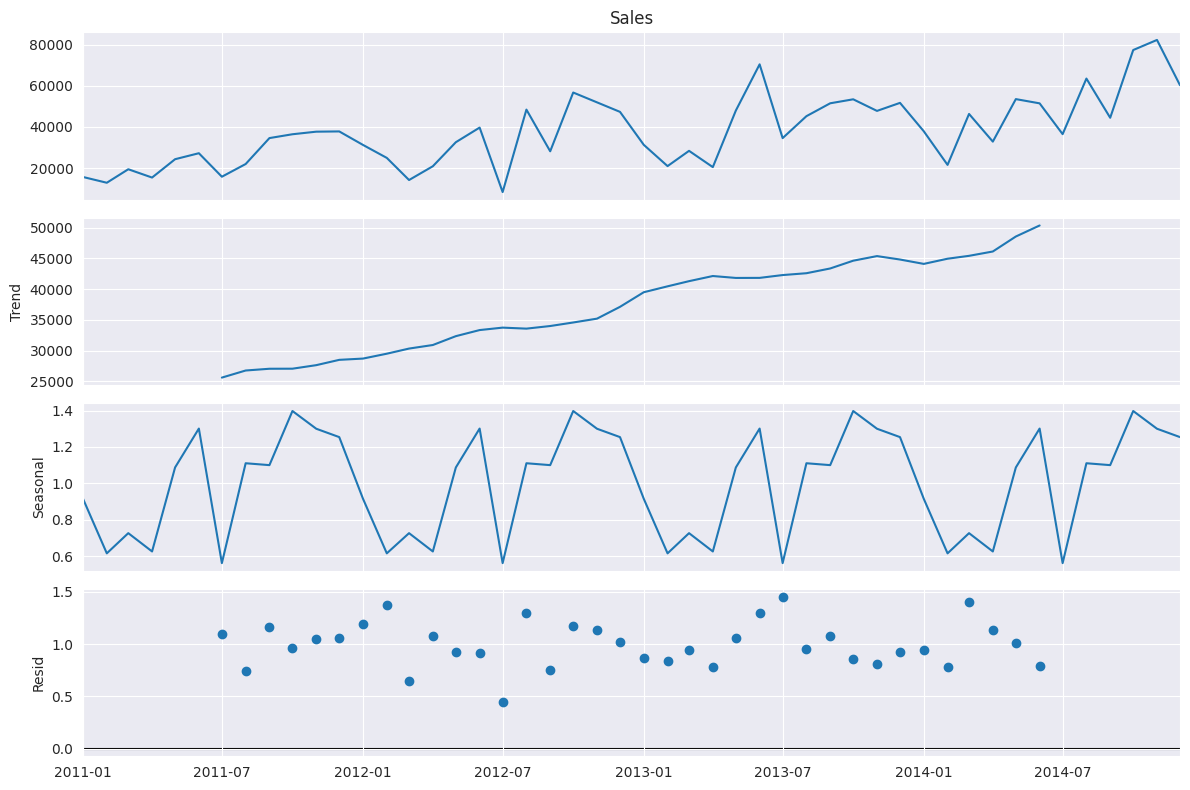

In [257]:
# with multiplicative seasonal index
decomposition = sm.tsa.seasonal_decompose(data1.Sales,
                                          model = 'multiplicative')
fig = decomposition.plot()
plt.show()

**Inference : The data contains level, trend and seasonality.**

**6. Build and Evaluate Time Series Forecast**

The number of observations in the train set are more than 10 (42 observations in train set) and our data has both Trend and Seasonality. As per the above flowchart, Holt Winters' Exponential Smoothing (among the smoothing techniques) and SARIMA model (among the ARIMA set of techniques) will be the best for forecasting the Sales for test data.


**Split the data into train and test sets.**

In [258]:
train_len = 42
train = data1[0 : train_len]
test = data1[train_len : ]

In [259]:
train.head()

,Sales
Order Date,
2011-01-01,15711.7125
2011-02-01,12910.8588
2011-03-01,19472.5632
2011-04-01,15440.3046
2011-05-01,24348.9723


In [260]:
test

,Sales
Order Date,
2014-07-01,36524.3028
2014-08-01,63521.7729
2014-09-01,44477.2662
2014-10-01,77379.8286
2014-11-01,82286.3583
2014-12-01,60292.1310


We build various Time Series Forecast models and compare the RMSE (Root Mean Squared Error) and MAPE (Mean Absolute Percentage Error) values for all the models. **Lower values of RMSE and MAPE are desired to conclude that a model performs better.**  Accuracy is calculated as (100 - MAPE). Lower the MAPE value, higher is the accuracy.

## Simple time series methods

### Naive method

In [261]:
y_hat_naive = test.copy()
y_hat_naive['naive_forecast'] = train['Sales'][train_len-1]

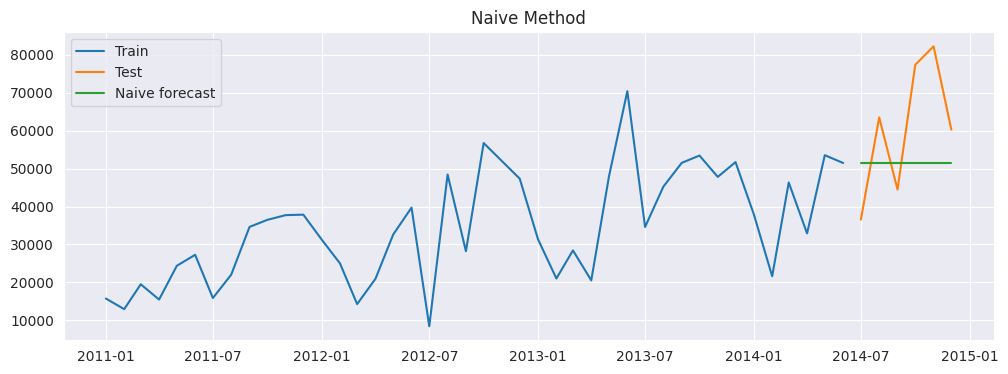

In [262]:
# Plot train, test and forecast

plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_naive['naive_forecast'], label='Naive forecast')
plt.legend(loc='best')
plt.title('Naive Method')
plt.show()

In [263]:
# Calculate RMSE and MAPE

from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_naive['naive_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_naive['naive_forecast'])/test['Sales'])*100,2)

results = pd.DataFrame({'Method':['Naive method'], 'MAPE': [mape], 'RMSE': [rmse]})
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,18774.05,26.86


### Simple average method

In [264]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['Sales'].mean()

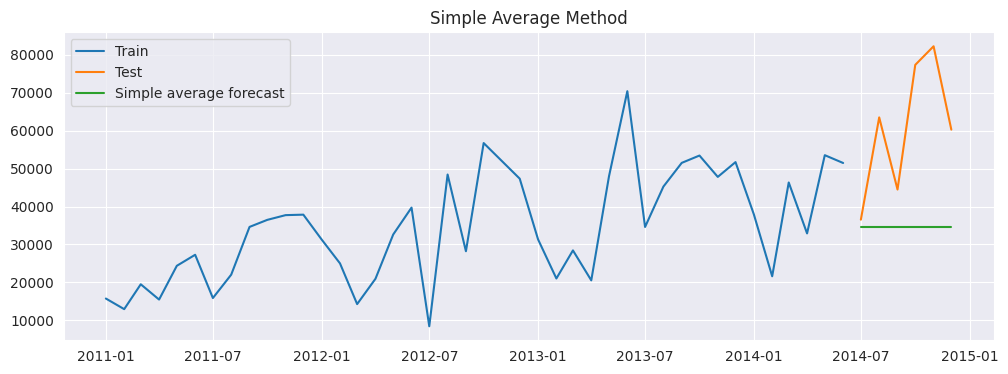

In [265]:
# Plot train, test and forecast

plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Simple average forecast')
plt.legend(loc='best')
plt.title('Simple Average Method')
plt.show()

In [266]:
# Calculate RMSE and MAPE

rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_avg['avg_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_avg['avg_forecast'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple average method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,18774.05,26.86
0,Simple average method,30846.00,38.18


### Simple moving average method

In [267]:
y_hat_sma = data1.copy()
ma_window = 12
y_hat_sma['sma_forecast'] = data1['Sales'].rolling(ma_window).mean()
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]

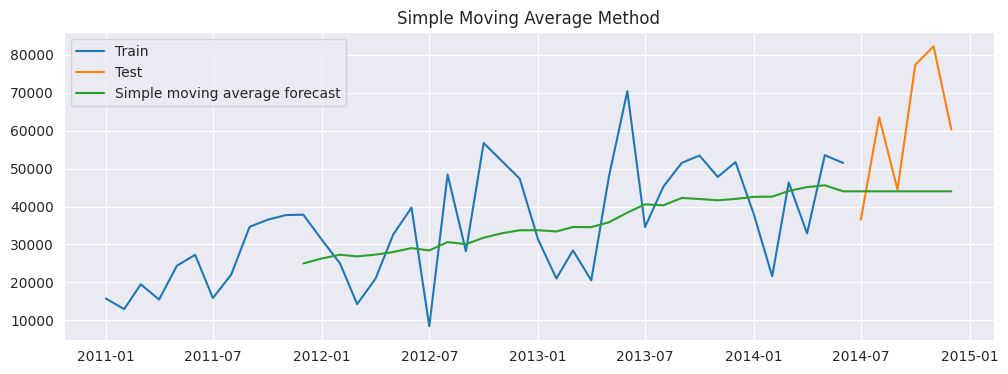

In [268]:
# Plot train, test and forecast

plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_sma['sma_forecast'], label='Simple moving average forecast')
plt.legend(loc='best')
plt.title('Simple Moving Average Method')
plt.show()

In [269]:
# Calculate RMSE and MAPE

rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_sma['sma_forecast'][train_len:])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_sma['sma_forecast'][train_len:])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple moving average forecast'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,18774.05,26.86
0,Simple average method,30846.00,38.18
0,Simple moving average forecast,23383.65,28.15


## Exponential Smoothing Techniques

### Simple exponential smoothing

In [270]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
model = SimpleExpSmoothing(train['Sales'])
model_fit = model.fit(optimized=True)
model_fit.params
y_hat_ses = test.copy()
y_hat_ses['ses_forecast'] = model_fit.forecast(len(test))

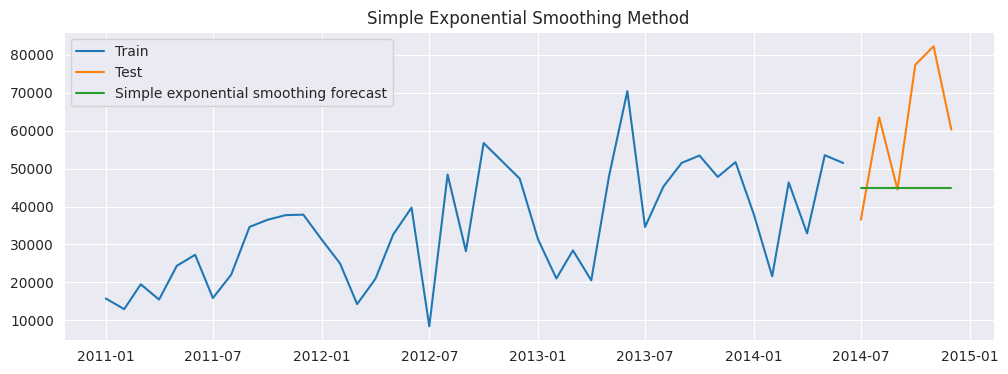

In [271]:
# Plot train, test, forecast

plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_ses['ses_forecast'], label='Simple exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Simple Exponential Smoothing Method')
plt.show()

In [272]:
# Calculate RMSE and MAPE

rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_ses['ses_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_ses['ses_forecast'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple exponential smoothing forecast'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results

,Method,RMSE,MAPE
0,Naive method,18774.05,26.86
0,Simple average method,30846.00,38.18
0,Simple moving average forecast,23383.65,28.15
0,Simple exponential smoothing forecast,22824.62,27.70


### Holt's method with trend

In [273]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(np.asarray(train['Sales']) ,seasonal_periods=12 ,trend='additive', seasonal=None)
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_holt = test.copy()
y_hat_holt['holt_forecast'] = model_fit.forecast(len(test))

{'smoothing_level': 0.1464285714285714, 'smoothing_trend': 0.128125, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 10555.930159999998, 'initial_trend': 2155.007810909092, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


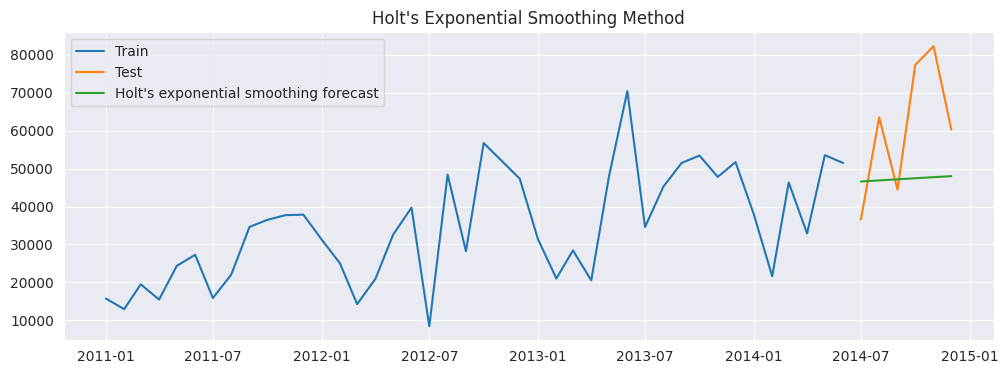

In [274]:
# Plot train, test, forecast

plt.figure(figsize=(12,4))
plt.plot( train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_holt['holt_forecast'], label='Holt\'s exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Holt\'s Exponential Smoothing Method')
plt.show()

In [275]:
# Calculate RMSE and MAPE

rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_holt['holt_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_holt['holt_forecast'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt\'s exponential smoothing method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,18774.05,26.86
0,Simple average method,30846.00,38.18
0,Simple moving average forecast,23383.65,28.15
0,Simple exponential smoothing forecast,22824.62,27.70
0,Holt's exponential smoothing method,20916.20,26.81


**Inference : Holt's exponential smoothing method performs better than Simple exponential smoothing.**

### Holt Winters' additive method with trend and seasonality

In [276]:
y_hat_hwa = test.copy()
model = ExponentialSmoothing(np.asarray(train['Sales']) ,seasonal_periods=12 ,trend='add', seasonal='add')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwa['hw_forecast'] = model_fit.forecast(len(test))

{'smoothing_level': 0.005, 'smoothing_trend': 0.005, 'smoothing_seasonal': 0.0001, 'damping_trend': nan, 'initial_level': 25191.878854999984, 'initial_trend': 549.1511154545474, 'initial_seasons': array([ -3046.57535417, -12233.28766042, -14734.34056667, -16050.40451667,
         2962.22100208,  17242.34903958, -17814.35478542,   4804.01762083,
          623.89353958,  15536.36958958,  13175.71666458,   9534.39542708]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


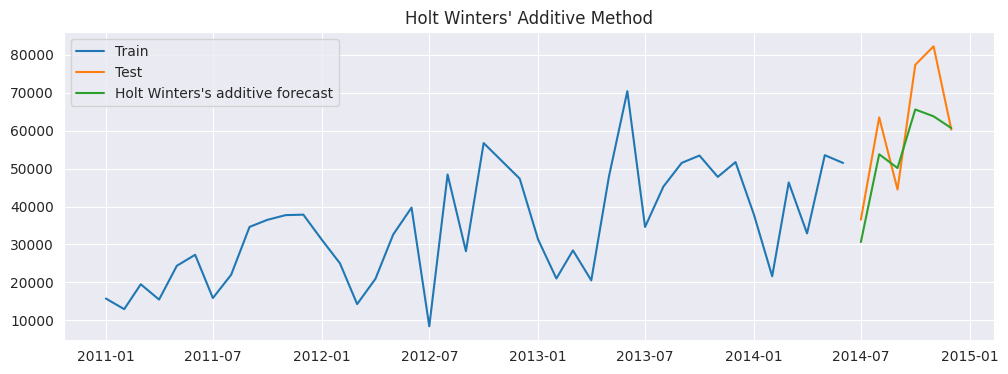

In [277]:
# Plot train, test, forecast

plt.figure(figsize=(12,4))
plt.plot( train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_hwa['hw_forecast'], label='Holt Winters\'s additive forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' Additive Method')
plt.show()

In [278]:
# Calculate RMSE and MAPE

rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_hwa['hw_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_hwa['hw_forecast'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt Winters\' additive method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,18774.05,26.86
0,Simple average method,30846.00,38.18
0,Simple moving average forecast,23383.65,28.15
0,Simple exponential smoothing forecast,22824.62,27.70
0,Holt's exponential smoothing method,20916.20,26.81
0,Holt Winters' additive method,10350.33,13.77


**Inference : Holt Winters' additive method performs better than Holt's method with trend.**

### Holt Winter's multiplicative method with trend and seasonality

In [279]:
y_hat_hwm = test.copy()
model = ExponentialSmoothing(np.asarray(train['Sales']) ,seasonal_periods=12 ,trend='add', seasonal='mul')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwm['hw_forecast'] = model_fit.forecast(len(test))

{'smoothing_level': 0.005, 'smoothing_trend': 0.005, 'smoothing_seasonal': 0.07107142857142858, 'damping_trend': nan, 'initial_level': 25191.878854999984, 'initial_trend': 549.1511154545474, 'initial_seasons': array([0.93074061, 0.67529696, 0.57227633, 0.57532186, 1.06552983,
       1.42137084, 0.42860295, 1.11971051, 1.04228985, 1.47741289,
       1.40453147, 1.28691591]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


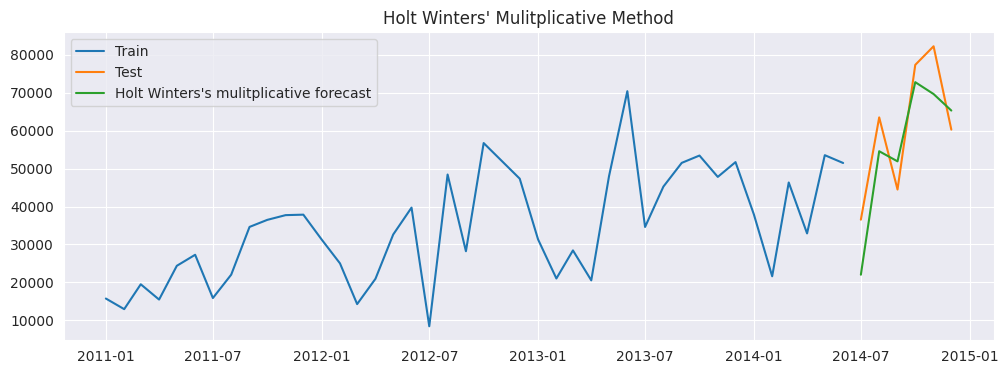

In [280]:
# Plot train, test, forecast

plt.figure(figsize=(12,4))
plt.plot( train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_hwm['hw_forecast'], label='Holt Winters\'s mulitplicative forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' Mulitplicative Method')
plt.show()

In [281]:
# Calculate RMSE and MAPE

rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_hwm['hw_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_hwm['hw_forecast'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt Winters\' multiplicative method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,18774.05,26.86
0,Simple average method,30846.00,38.18
0,Simple moving average forecast,23383.65,28.15
0,Simple exponential smoothing forecast,22824.62,27.70
0,Holt's exponential smoothing method,20916.20,26.81
0,Holt Winters' additive method,10350.33,13.77
0,Holt Winters' multiplicative method,9585.23,16.69


**Inference : Holt Winters' additive method performs better than Holt Winters' multiplicative method.**

We can conclude that the Holt Winters' additive method in the smoothing techniques is able to forecast the sales closer to the actual values.The RMSE and MAPE values for this method are lower as compared to other model methods. This method is very well able to capture the trend and seasonality in the data.

**Auto Regressive methods**

Check whether the time series is stationary

Augmented Dickey-Fuller (ADF) test

In [282]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(data1['Sales'])

print('ADF Statistic: %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' %adf_test[1])

ADF Statistic: -2.220857
Critical Values @ 0.05: -2.93
p-value: 0.198763


**Inference : p-value is more than 0.05. This means that the series is not stationary.**

Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test

In [283]:
from statsmodels.tsa.stattools import kpss
kpss_test = kpss(data1['Sales'])

print('KPSS Statistic: %f' % kpss_test[0])
print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
print('p-value: %f' % kpss_test[1])

KPSS Statistic: 0.940353
Critical Values @ 0.05: 0.46
p-value: 0.010000


**Inference : p-value is less than 0.05. This means that the series is not stationary.**

*To make the series stationary, we need to perform transformation and differencing.*

### Box Cox transformation to make variance constant

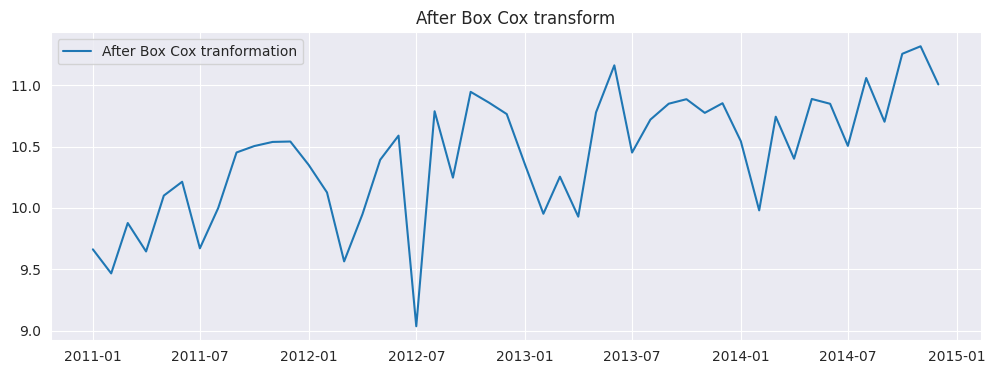

In [284]:
from scipy.stats import boxcox
data_boxcox = pd.Series(boxcox(data1['Sales'], lmbda=0), index = data1.index)

plt.figure(figsize=(12,4))
plt.plot(data_boxcox, label='After Box Cox tranformation')
plt.legend(loc='best')
plt.title('After Box Cox transform')
plt.show()

### Differencing to remove trend

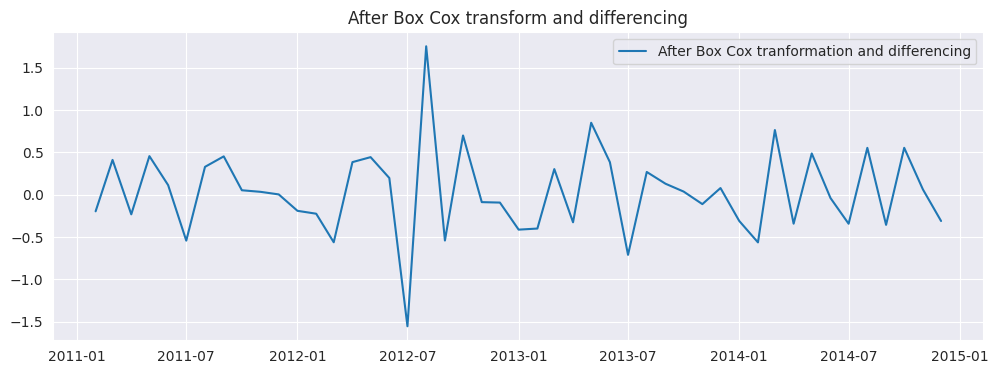

In [285]:
data_boxcox_diff = pd.Series(data_boxcox - data_boxcox.shift(), data1.index)
plt.figure(figsize=(12,4))
plt.plot(data_boxcox_diff, label='After Box Cox tranformation and differencing')
plt.legend(loc='best')
plt.title('After Box Cox transform and differencing')
plt.show()

In [286]:
# After shifting the data, drop the first value which is NA
data_boxcox_diff.dropna(inplace=True)

In [287]:
data_boxcox_diff.tail()

Order Date
2014-08-01    0.553405
2014-09-01   -0.356405
2014-10-01    0.553748
2014-11-01    0.061479
2014-12-01   -0.311004
Freq: MS, dtype: float64

**Now let us see whether our series has become stationary.**

Augmented Dickey-Fuller (ADF) test

In [288]:
adf_test = adfuller(data_boxcox_diff)

print('ADF Statistic: %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])

ADF Statistic: -5.769275
Critical Values @ 0.05: -2.95
p-value: 0.000001


**Inference : p-value is less than 0.05. This means that the series is stationary.**

Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test

In [289]:
kpss_test = kpss(data_boxcox_diff)

print('KPSS Statistic: %f' % kpss_test[0])
print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
print('p-value: %f' % kpss_test[1])

KPSS Statistic: 0.094966
Critical Values @ 0.05: 0.46
p-value: 0.100000


**Inference : p-value is greater than 0.05. This means the series is stationary.**

### Train-Test Split

In [290]:
train_data_boxcox = data_boxcox[:train_len]
test_data_boxcox = data_boxcox[train_len:]
train_data_boxcox_diff = data_boxcox_diff[:train_len-1]
test_data_boxcox_diff = data_boxcox_diff[train_len-1:]

### Now let us proceed towards building various AR models to forecast the Sales.

### Auto regression method (AR)

In [291]:
from statsmodels.tsa.arima.model import ARIMA

In [292]:
model = ARIMA(train_data_boxcox_diff, order=(1, 0, 0))
model_fit = model.fit()
print(model_fit.params)

const     0.031315
ar.L1    -0.483974
sigma2    0.211971
dtype: float64


In [293]:
# Recover original time series

y_hat_ar = data_boxcox_diff.copy()
y_hat_ar['ar_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox_diff'].cumsum()
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox'].add(data_boxcox[0])
y_hat_ar['ar_forecast'] = np.exp(y_hat_ar['ar_forecast_boxcox'])

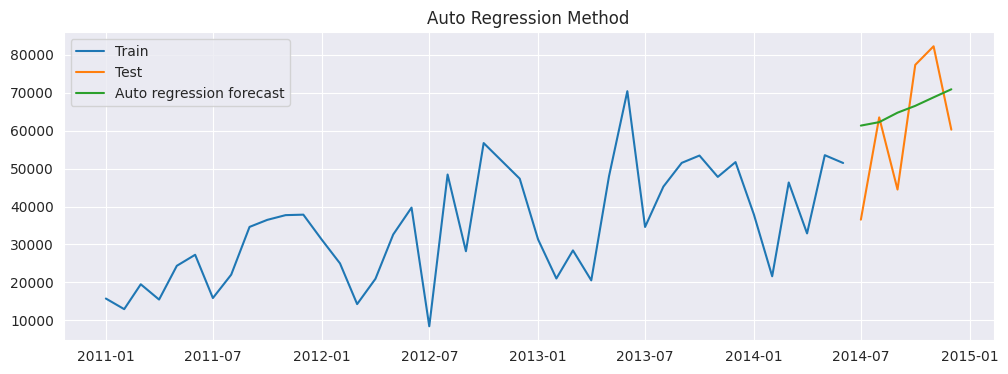

In [294]:
# Plot train, test and forecast

plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_ar['ar_forecast'][test.index.min():], label='Auto regression forecast')
plt.legend(loc='best')
plt.title('Auto Regression Method')
plt.show()

In [295]:
# Calculate RMSE and MAPE

rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_ar['ar_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_ar['ar_forecast'][test.index.min():])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Autoregressive (AR) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,18774.05,26.86
0,Simple average method,30846.00,38.18
0,Simple moving average forecast,23383.65,28.15
0,Simple exponential smoothing forecast,22824.62,27.70
0,Holt's exponential smoothing method,20916.20,26.81
0,Holt Winters' additive method,10350.33,13.77
0,Holt Winters' multiplicative method,9585.23,16.69
0,Autoregressive (AR) method,15498.94,27.26


**Inference : AR method works better than Holt Winters' multiplicative method but works poorer than Holt Winters' additive method.**

### Moving average method (MA)

In [296]:
model = ARIMA(train_data_boxcox_diff, order=(0, 0, 1))
model_fit = model.fit()
print(model_fit.params)

const     0.022689
ma.L1    -0.999630
sigma2    0.155059
dtype: float64


In [297]:
# Recover original time series

y_hat_ma = data_boxcox_diff.copy()
y_hat_ma['ma_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox_diff'].cumsum()
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox'].add(data_boxcox[0])
y_hat_ma['ma_forecast'] = np.exp(y_hat_ma['ma_forecast_boxcox'])

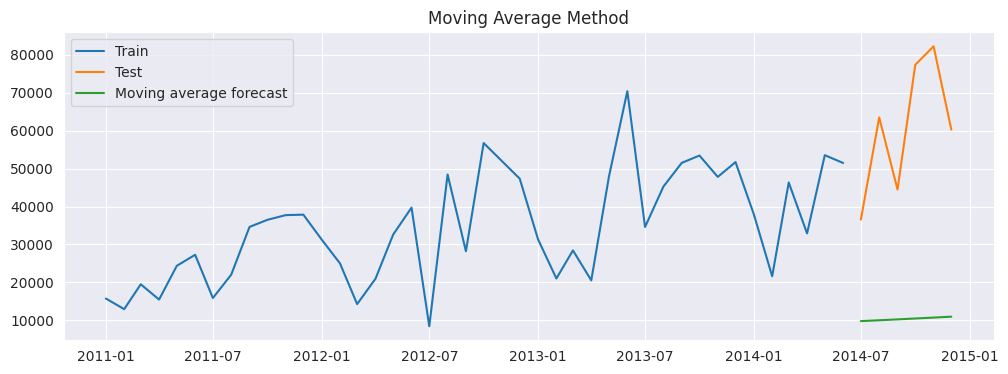

In [298]:
# Plot train, test and forecast

plt.figure(figsize=(12,4))
plt.plot(data1['Sales'][:train_len], label='Train')
plt.plot(data1['Sales'][train_len:], label='Test')
plt.plot(y_hat_ma['ma_forecast'][test.index.min():], label='Moving average forecast')
plt.legend(loc='best')
plt.title('Moving Average Method')
plt.show()

In [299]:
# Calculate RMSE and MAPE

rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_ma['ma_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_ma['ma_forecast'][test.index.min():])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Moving Average (MA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,18774.05,26.86
0,Simple average method,30846.00,38.18
0,Simple moving average forecast,23383.65,28.15
0,Simple exponential smoothing forecast,22824.62,27.70
0,Holt's exponential smoothing method,20916.20,26.81
0,Holt Winters' additive method,10350.33,13.77
0,Holt Winters' multiplicative method,9585.23,16.69
0,Autoregressive (AR) method,15498.94,27.26
0,Moving Average (MA) method,52917.91,81.67


**Inference : MA method clearly performs poorer as compared to AR method.**

### Auto regression moving average method (ARMA)

In [300]:
model = ARIMA(train_data_boxcox_diff, order=(1, 0, 1))
model_fit = model.fit()
print(model_fit.params)

const     0.022805
ar.L1     0.115914
ma.L1    -0.999967
sigma2    0.153803
dtype: float64


In [301]:
# Recover original time series

y_hat_arma = data_boxcox_diff.copy()
y_hat_arma['arma_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox_diff'].cumsum()
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox'].add(data_boxcox[0])
y_hat_arma['arma_forecast'] = np.exp(y_hat_arma['arma_forecast_boxcox'])

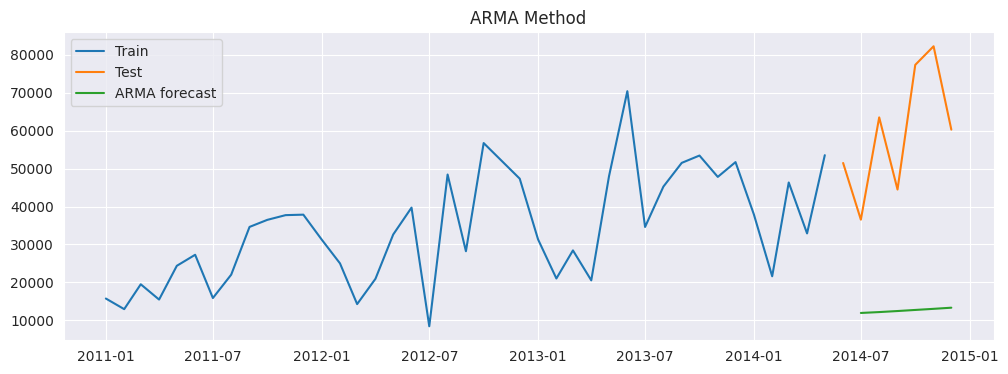

In [302]:
# Plot train, test and forecast

plt.figure(figsize=(12,4))
plt.plot( data1['Sales'][:train_len-1], label='Train')
plt.plot(data1['Sales'][train_len-1:], label='Test')
plt.plot(y_hat_arma['arma_forecast'][test.index.min():], label='ARMA forecast')
plt.legend(loc='best')
plt.title('ARMA Method')
plt.show()

In [303]:
# Calculate RMSE and MAPE

rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_arma['arma_forecast'][train_len-1:])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_arma['arma_forecast'][train_len-1:])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Autoregressive moving average (ARMA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,18774.05,26.86
0,Simple average method,30846.00,38.18
0,Simple moving average forecast,23383.65,28.15
0,Simple exponential smoothing forecast,22824.62,27.70
0,Holt's exponential smoothing method,20916.20,26.81
0,Holt Winters' additive method,10350.33,13.77
0,Holt Winters' multiplicative method,9585.23,16.69
0,Autoregressive (AR) method,15498.94,27.26
0,Moving Average (MA) method,52917.91,81.67
0,Autoregressive moving average (ARMA) method,50774.56,77.69


### Auto regressive integrated moving average (ARIMA)

In [304]:
model = ARIMA(train_data_boxcox, order=(1, 1, 1))
model_fit = model.fit()
print(model_fit.params)

ar.L1     0.124022
ma.L1    -0.815408
sigma2    0.187390
dtype: float64


In [305]:
# Recover original time series forecast

y_hat_arima = data_boxcox_diff.copy()
y_hat_arima['arima_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox_diff'].cumsum()
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox'].add(data_boxcox[0])
y_hat_arima['arima_forecast'] = np.exp(y_hat_arima['arima_forecast_boxcox'])

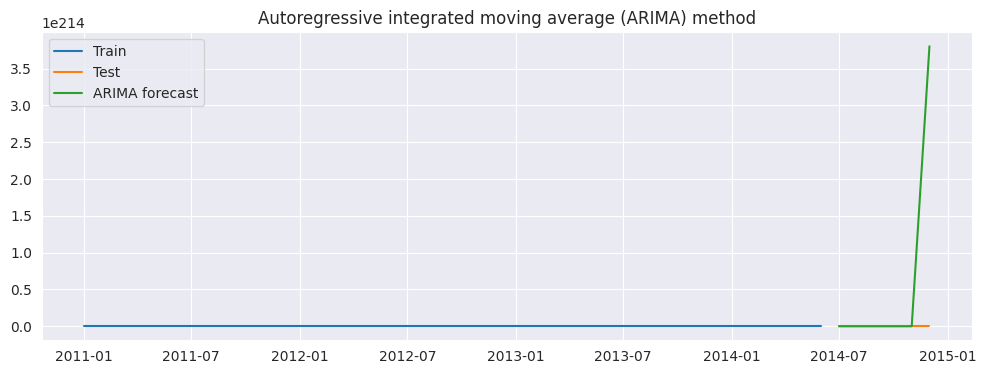

In [306]:
# Plot train, test and forecast

plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_arima['arima_forecast'][test.index.min():], label='ARIMA forecast')
plt.legend(loc='best')
plt.title('Autoregressive integrated moving average (ARIMA) method')
plt.show()

In [ ]:
# Calculate RMSE and MAPE

rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_arima['arima_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_arima['arima_forecast'][test.index.min():])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Autoregressive integrated moving average (ARIMA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

### Seasonal auto regressive integrated moving average (SARIMA)

In [307]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train_data_boxcox, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit()
print(model_fit.params)

ar.L1      -0.100160
ma.L1      -0.994958
ar.S.L12   -0.395103
ma.S.L12   -0.987966
sigma2      0.047259
dtype: float64


In [308]:
# Recover original time series forecast

y_hat_sarima = data_boxcox_diff.copy()
y_hat_sarima['sarima_forecast_boxcox'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_sarima['sarima_forecast'] = np.exp(y_hat_sarima['sarima_forecast_boxcox'])

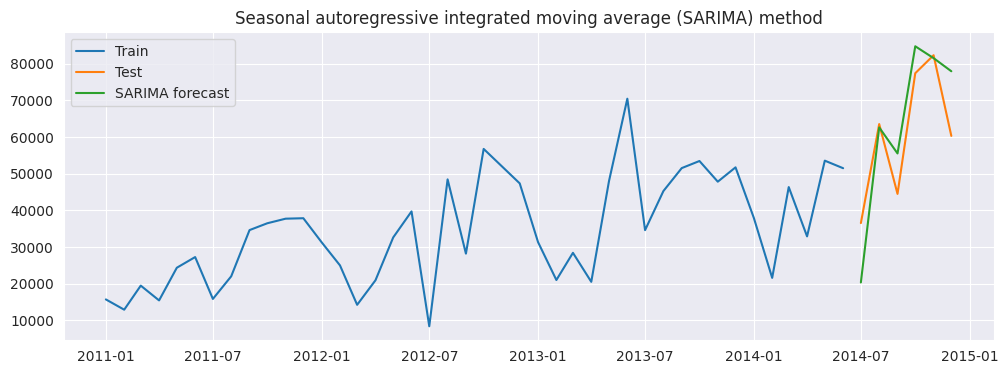

In [309]:
# Plot train, test and forecast

plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_sarima['sarima_forecast'][test.index.min():], label='SARIMA forecast')
plt.legend(loc='best')
plt.title('Seasonal autoregressive integrated moving average (SARIMA) method')
plt.show()

In [310]:
# Calculate RMSE and MAPE

rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_sarima['sarima_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_sarima['sarima_forecast'][test.index.min():])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Seasonal autoregressive integrated moving average (SARIMA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,18774.05,26.86
0,Simple average method,30846.00,38.18
0,Simple moving average forecast,23383.65,28.15
0,Simple exponential smoothing forecast,22824.62,27.70
0,Holt's exponential smoothing method,20916.20,26.81
0,Holt Winters' additive method,10350.33,13.77
0,Holt Winters' multiplicative method,9585.23,16.69
0,Autoregressive (AR) method,15498.94,27.26
0,Moving Average (MA) method,52917.91,81.67
0,Autoregressive moving average (ARMA) method,50774.56,77.69


**Inference : SARIMA method performs the best among ARIMA set of models.**

**Conclusion:** Our inference from the flow chart and the actual models built for forecasting the sales of the time series data, show that:
* Holt Winters' additive method
* Seasonal auto regressive integrated moving average (SARIMA) technique

are the best for forecasting the sales for the data.<br><br> Both the methods have **lower RMSE and MAPE values** and are able to capture the trend and seasonality components well in the data.

In [311]:
final_result = pd.DataFrame({'Method' : ["Holt Winters' additive method", 'SARIMA'], 'RMSE' : [9012.78, 9636.49], 'MAPE' : [9.39,12.95]})

In [312]:
final_result

,Method,RMSE,MAPE
0,Holt Winters' additive method,9012.78,9.39
1,SARIMA,9636.49,12.95
